In [ ]:
import os, sys

sys.path.append(os.path.abspath(os.path.join("../..")))  # access sibling directories
sys.path.append(os.path.abspath(os.path.join("../../../BayesFlow_dev/BayesFlow/")))

from src.python.helpers import load_empirical_rt_data, join_and_fill_missings
from src.python.helpers import (
    load_empirical_rt_data, 
    join_and_fill_missings
)
from src.python.settings import plotting_settings

import bayesflow as bf
import numpy as np
import tensorflow as tf
import pandas as pd
from functools import partial
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Compare simulated and empirical data

# Load data

In [2]:
# Empirical data
parent_folder = os.path.dirname(os.path.dirname(os.getcwd()))
color_folder = os.path.join(
    parent_folder, "data/levy_comparison/data_rts/color"
)
lexical_folder = os.path.join(
    parent_folder, "data/levy_comparison/data_rts/lexical"
)

color_data = load_empirical_rt_data(color_folder)
lexical_data = load_empirical_rt_data(lexical_folder)

# Join experimental data and fill missing values
empirical_data = join_and_fill_missings(
    color_data, lexical_data, n_trials=900, missing_rts_equal_mean=True
)

In [3]:
# Test data
# Powerscaled
path = "../../data/levy_comparison/sim_powerscaled/test.pkl"
with open(path, "rb") as file:
    test_data_scaled = pickle.load(file)

# Unscaled
path = "../../data/levy_comparison/sim_unscaled/test.pkl"
with open(path, "rb") as file:
   test_data_unscaled = pickle.load(file)

# Means

In [4]:
# Amount of missing data filled - overall
np.mean(empirical_data[..., 2] == -1)

0.03169444444444444

In [5]:
# Amount of missing data filled - person-wise, processed complete file and raw data files match
coded_missings = np.sum(empirical_data[..., 2] == -1, axis=(0, 2))
color_missings = np.array([500-x.shape[2] for x in color_data])
lexical_missings = np.array([400-x.shape[2] for x in lexical_data])
uncoded_missings = color_missings + lexical_missings
print(np.equal(coded_missings, uncoded_missings))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [11]:
# Percentage of missings per task - aligns with Wieschen et al. (2020)
print(np.sum(color_missings)/(500*40))
print(np.sum(lexical_missings)/(400*40))

0.0359
0.0264375


In [7]:
# Stimuli
for model in [0, 1, 2, 3]:
    sim_data = test_data_scaled["model_outputs"][model]["sim_data"]
    print(f"{np.mean(sim_data[..., 0])} (M{model+1})")
print(f"{np.mean(empirical_data[..., 0])} (combined data)")
print(f"{np.mean(empirical_data[..., 0][empirical_data[..., 2] != -1])} (combined data without missings)") 
print(f"{np.mean([np.mean(x[..., 0]) for x in color_data])} (color data)") # care: mean over person means
print(f"{np.mean([np.mean(x[..., 0]) for x in lexical_data])} (lexical data)") # care: mean over person means

0.4999579861111111 (M1)
0.5000514444444445 (M2)
0.5000030972222222 (M3)
0.4999457361111111 (M4)
0.5 (combined data)
0.49912503361701965 (combined data without missings)
0.4995979368686676 (color data)
0.49849265813827515 (lexical data)


In [4]:
# RTs
for model in [0, 1, 2, 3]:
    sim_data = test_data_scaled["model_outputs"][model]["sim_data"]
    print(f"{np.mean(sim_data[..., 1])} (M{model+1})")
print(f"{np.mean(empirical_data[..., 1])} (combined data)")
print(f"{np.mean([np.mean(x[..., 1]) for x in color_data])} (color data)") # care: mean over person means
print(f"{np.mean([np.mean(x[..., 1]) for x in lexical_data])} (lexical data)") # care: mean over person means

1.0377851534185822 (M1)
1.0627947280967218 (M2)
1.0137968000671536 (M3)
1.0281704627141115 (M4)
0.6249161958694458 (combined data)
0.6259922385215759 (color data)
0.6228166818618774 (lexical data)


In [6]:
# Choices
for model in [0, 1, 2, 3]:
    sim_data = test_data_scaled["model_outputs"][model]["sim_data"]
    print(f"{np.mean(sim_data[..., 2])} (M{model+1})")
print(f"{np.mean(empirical_data[..., 2])} (combined data with missings)") # lower as missing choices are coded with -1
print(f"{np.mean(empirical_data[..., 2][empirical_data[..., 2] != -1])} (combined data without missings)") 
print(f"{np.mean([np.mean(x[..., 2]) for x in color_data])} (color data)") # care: mean over person means
print(f"{np.mean([np.mean(x[..., 2]) for x in lexical_data])} (lexical data)") # care: mean over person means

0.5028425694444445 (M1)
0.4988265972222222 (M2)
0.4988627361111111 (M3)
0.5006901388888889 (M4)
0.4383888840675354 (combined data with missings)
0.4854700267314911 (combined data without missings)
0.5072606801986694 (color data)
0.4583521783351898 (lexical data)


In [8]:
# Accuracies
for model in [0, 1, 2, 3]:
    sim_data = test_data_scaled["model_outputs"][model]["sim_data"]
    print(f"{np.mean(sim_data[..., 0] == sim_data[..., 2])} (M{model+1})")
print(f"{np.mean(empirical_data[..., 0] == empirical_data[..., 2])} (combined data with missings)") # lower as missing choices are coded with -1
print(f"{np.mean(empirical_data[..., 0][empirical_data[..., 2] != -1] == empirical_data[..., 2][empirical_data[..., 2] != -1])} (combined data without missings)")
print(f"{np.mean([np.mean(x[..., 0] == x[..., 2]) for x in color_data])} (color data)") # care: mean over person means
print(f"{np.mean([np.mean(x[..., 0] == x[..., 2]) for x in lexical_data])} (lexical data)") # care: mean over person means

0.9036507361111111 (M1)
0.905632625 (M2)
0.8237416805555555 (M3)
0.8237620277777777 (M4)
0.8553611111111111 (combined data with missings)
0.8833586735132964 (combined data without missings)
0.8599033038743695 (color data)
0.912900105745672 (lexical data)


In [9]:
# Accuracies of fast responses
for model in [0, 1, 2, 3]:
    sim_data = test_data_scaled["model_outputs"][model]["sim_data"]
    filter = (sim_data[..., 1] < 0.3)
    print(f"{np.mean(sim_data[..., 0][filter] == sim_data[..., 2][filter])} (M{model+1})")
filter = (empirical_data[..., 1] < 0.3)
print(f"{np.mean(empirical_data[..., 0][filter] == empirical_data[..., 2][filter])} (combined data with missings)")

0.8374041235132026 (M1)
0.8635332276057334 (M2)
0.813301043820246 (M3)
0.8208780399855461 (M4)
0.5631067961165048 (combined data with missings)


In [29]:
# Number of fast responses
for model in [0, 1, 2, 3]:
    sim_data = test_data_scaled["model_outputs"][model]["sim_data"]
    filter = (sim_data[..., 1] < 0.3)
    print(f"{sim_data[filter].shape[0]/sim_data.shape[0]} (M{model+1})")
filter = (empirical_data[..., 1] < 0.3)
print(f"{empirical_data[filter].shape[0]} (combined data with missings)")

3858.535 (M1)
3096.412 (M2)
4371.8395 (M3)
3623.4205 (M4)
206 (combined data with missings)


In [11]:
# Check training (= configured with missing mask) simulation data 
from src.python.helpers import MaskingConfigurator

masking_configurator = MaskingConfigurator(power_scaling=True)

trainer = bf.trainers.Trainer(
    amortizer=bf.amortizers.AmortizedModelComparison(bf.inference_networks.PMPNetwork(4)),
    configurator=masking_configurator
)
sim_data_transformed = trainer.configurator(test_data_scaled)
sim_indices = sim_data_transformed["model_indices"]

INFO:root:Trainer initialization: No generative model provided. Only offline learning mode is available!


In [16]:
# Mean over all models before masking (no missings induced)
print(f"Stimuli: {np.mean([test_data_scaled['model_outputs'][model]['sim_data'][..., 0] for model in [0, 1, 2, 3]])}")
print(f"RTs: {np.mean([test_data_scaled['model_outputs'][model]['sim_data'][..., 1] for model in [0, 1, 2, 3]])}")
print(f"Choices: {np.mean([test_data_scaled['model_outputs'][model]['sim_data'][..., 2] for model in [0, 1, 2, 3]])}")
print(f"Accuracies: {np.mean([test_data_scaled['model_outputs'][model]['sim_data'][..., 0] == test_data_scaled['model_outputs'][model]['sim_data'][..., 2] for model in [0, 1, 2, 3]])}")

Stimuli: 0.4999895659722222
RTs: 0.9251838867765239
Choices: 0.5021557291666666
Accuracies: 0.8099632604166667


In [18]:
# Mean over all models after masking
print(f"Fraction missing: {np.mean(sim_data_transformed['summary_conditions'][..., 2] == -1)}")
print(f"Stimuli: {np.mean(sim_data_transformed['summary_conditions'][..., 0])}")
print(f"RTs: {np.mean(sim_data_transformed['summary_conditions'][..., 1])}")
print(f"Choices: {np.mean(sim_data_transformed['summary_conditions'][..., 2])}") # lower because of -1s induced
print(f"Accuracies: {np.mean(sim_data_transformed['summary_conditions'][..., 0] == sim_data_transformed['summary_conditions'][..., 2])}")

Fraction missing: 0.032308989583333336
Stimuli: 0.4999905526638031
RTs: 0.9251842498779297
Choices: 0.45362627506256104
Accuracies: 0.7837880069444444


# Distributions

In [8]:
rts_sim_correct = []
rts_sim_incorrect = []

for model in range(4):
    sim_data = test_data_scaled["model_outputs"][model]["sim_data"]
    correct = sim_data[..., 1][sim_data[..., 0] == sim_data[..., 2]]
    rts_sim_correct.append(correct)
    incorrect = sim_data[..., 1][sim_data[..., 0] != sim_data[..., 2]]
    rts_sim_incorrect.append(incorrect)

In [9]:
rts_emp_correct = empirical_data[..., 1][empirical_data[..., 0] == empirical_data[..., 2]]
rts_emp_incorrect = empirical_data[..., 1][empirical_data[..., 0] != empirical_data[..., 2]]


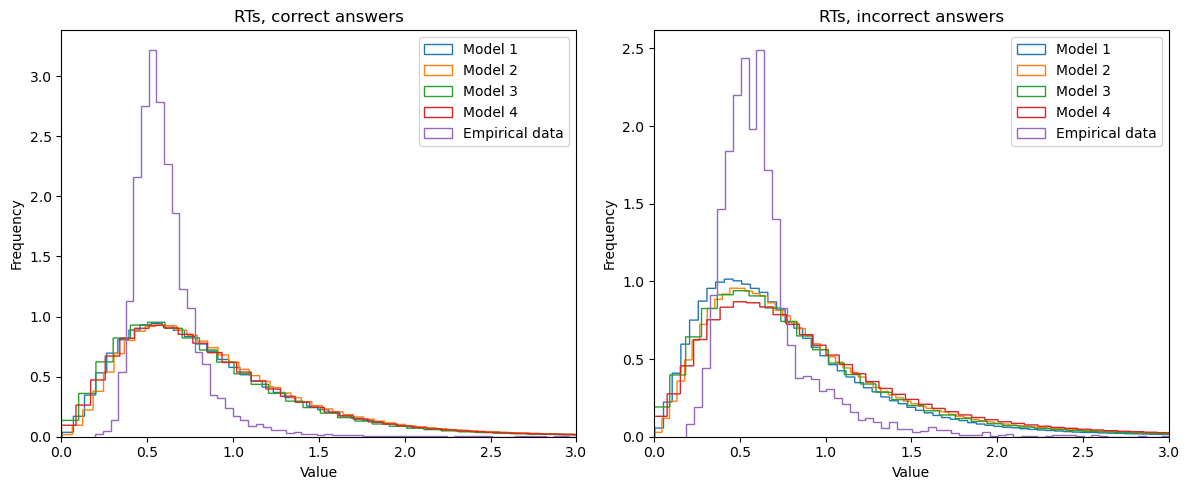

In [18]:
# Plot typical simulated rts vs empirical rts
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sim_data_lists = [rts_sim_correct, rts_sim_incorrect]
emp_data_lists = [rts_emp_correct, rts_emp_incorrect]
titles = ['RTs, correct answers', 'RTs, incorrect answers']


for i, (data_list, title) in enumerate(zip(sim_data_lists, titles)):
    ax = axes[i]
    ax.set_title(title)
    ax.set_xlim([0, 3])
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

    for j, data in enumerate(data_list):
        ax.hist(data, bins=1000, histtype='step', label=f'Model {j+1}', density = True)

    ax.hist(emp_data_lists[i], bins = 100, histtype='step', label='Empirical data', density = True)

    ax.legend()

plt.tight_layout()
plt.show()
